In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingUS.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,241,2012-10-11,United States,41.911282,-87.702463,1.0,1.0,1.0,1.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10
1,242,2015-06-15,United States,41.906670,-87.714291,2.0,1.5,1.0,1.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6
2,243,2015-02-10,United States,41.905264,-87.710297,2.0,1.0,1.0,1.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
3,244,2014-10-08,United States,41.896352,-87.729763,6.0,1.0,2.0,3.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10
4,245,2011-10-13,United States,41.887172,-87.707650,2.0,1.0,1.0,1.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103023,494562,2012-07-06,United States,30.308821,-97.683092,5.0,1.5,3.0,3.0,200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7
103024,494563,2014-06-25,United States,30.447134,-97.797278,1.0,1.0,0.0,1.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
103025,494564,2015-04-22,United States,30.461093,-97.798083,8.0,2.0,2.0,4.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
103026,494565,2015-02-15,United States,30.235288,-97.808926,2.0,1.0,1.0,1.0,65.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2


<AxesSubplot:ylabel='Frequency'>

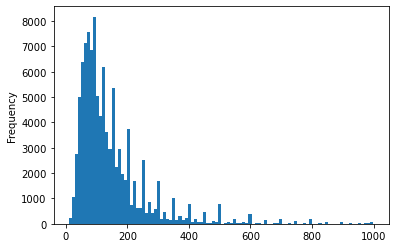

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,241,2012-10-11,United States,41.911282,-87.702463,1.0,1.0,1.0,1.0,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10,group_1
1,242,2015-06-15,United States,41.906670,-87.714291,2.0,1.5,1.0,1.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,group_2
2,243,2015-02-10,United States,41.905264,-87.710297,2.0,1.0,1.0,1.0,39.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,group_1
3,244,2014-10-08,United States,41.896352,-87.729763,6.0,1.0,2.0,3.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10,group_2
4,245,2011-10-13,United States,41.887172,-87.707650,2.0,1.0,1.0,1.0,39.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10,group_1


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.361384
group_3    0.223787
group_5    0.175536
group_4    0.128558
group_1    0.110735
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.361400
group_3    0.223770
group_5    0.175531
group_4    0.128555
group_1    0.110744
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
75437,382443,2015-10-05,United States,37.791333,-122.426209,2.0,1.0,1.0,1.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10
66735,325223,2013-12-05,United States,45.564609,-122.663617,2.0,1.0,1.0,1.0,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,12
74801,376240,2015-03-03,United States,30.328177,-97.921863,16.0,2.0,4.0,12.0,575.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3
11051,58032,2014-03-26,United States,40.795977,-73.961680,6.0,1.0,2.0,4.0,220.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3
29473,147032,2015-09-13,United States,39.740100,-105.037606,2.0,1.0,1.0,1.0,75.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,9


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
71063,30.275413,-97.751713,4.0,1.0,1.0,2.0,110.0,1.0,0.0,3.0,1125.0,16.0,0.0,1.0,0.0,1,10
49904,32.798380,-117.232689,6.0,1.0,2.0,6.0,165.0,4.0,20.0,2.0,1125.0,71.0,1.0,0.0,0.0,0,7
68748,38.836604,-76.999011,2.0,2.0,1.0,1.0,85.0,2.0,20.0,1.0,1125.0,50.0,1.0,0.0,0.0,3,10
65804,40.743922,-73.979592,2.0,1.0,1.0,1.0,80.0,1.0,0.0,1.0,1125.0,4.0,0.0,1.0,0.0,2,12
58472,41.803036,-87.621326,2.0,1.0,1.0,1.0,55.0,1.0,0.0,2.0,1125.0,22.0,0.0,1.0,0.0,2,10


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
75437,115.0
66735,72.0
74801,575.0
11051,220.0
29473,75.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
75437,37.791333,-122.426209,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,1.0,0.0,0.0,0,10
66735,45.564609,-122.663617,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,143.0,0.0,1.0,0.0,3,12
74801,30.328177,-97.921863,16.0,2.0,4.0,12.0,15.0,25.0,3.0,1125.0,10.0,1.0,0.0,0.0,1,3
11051,40.795977,-73.961680,6.0,1.0,2.0,4.0,4.0,45.0,3.0,1125.0,27.0,1.0,0.0,0.0,2,3
29473,39.740100,-105.037606,2.0,1.0,1.0,1.0,1.0,0.0,1.0,7.0,2.0,0.0,1.0,0.0,6,9


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
71063,110.0
49904,165.0
68748,85.0
65804,80.0
58472,55.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
71063,30.275413,-97.751713,4.0,1.0,1.0,2.0,1.0,0.0,3.0,1125.0,16.0,0.0,1.0,0.0,1,10
49904,32.798380,-117.232689,6.0,1.0,2.0,6.0,4.0,20.0,2.0,1125.0,71.0,1.0,0.0,0.0,0,7
68748,38.836604,-76.999011,2.0,2.0,1.0,1.0,2.0,20.0,1.0,1125.0,50.0,1.0,0.0,0.0,3,10
65804,40.743922,-73.979592,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,4.0,0.0,1.0,0.0,2,12
58472,41.803036,-87.621326,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,22.0,0.0,1.0,0.0,2,10


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_1244/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


Text(0.5, 0, 'Relative Importance')

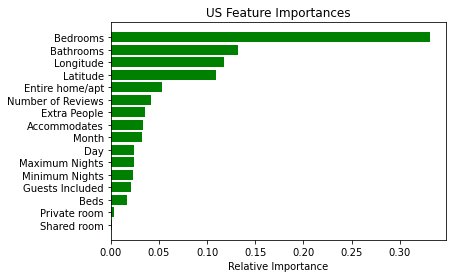

In [ ]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('US Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [ ]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

685.9899333563853 26.19140953359298 14.993807357258985
